In [16]:
%load_ext autoreload
%autoreload 2

In [ ]:
import importlib
import json
from pathlib import Path

# import sys
# import os
import matplotlib.pyplot as plt

In [ ]:
import unified_vis

importlib.reload(unified_vis)
from unified_vis import plot_span_timeline, plot_run_stack_latency

In [40]:
plt.rcParams["text.usetex"] = False

In [4]:
# python -m open_deep_research.summarize_timeline \j
# 	/home/matt/dere/gensee_odr/outputs/drb_g25_tav.json \
# 	/home/matt/dere/gensee_odr/outputs/drb_g25_gen.json \
# 	/home/matt/dere/gensee_odr/outputs/drb_g3_tav.json \
# 	/home/matt/dere/gensee_odr/outputs/drb_g3_gen.json

drb_outputs = [
    Path("/home/matt/dere/gensee_odr/outputs/drb_g25_tav.json"),
    Path("/home/matt/dere/gensee_odr/outputs/drb_g25_gen.json"),
    Path("/home/matt/dere/gensee_odr/outputs/drb_g3_tav.json"),
    Path("/home/matt/dere/gensee_odr/outputs/drb_g3_gen.json"),
]
rb_outputs = [
    Path("/home/matt/dere/gensee_odr/outputs/rb_g25_tav.json"),
    Path("/home/matt/dere/gensee_odr/outputs/rb_g25_gen.json"),
    Path("/home/matt/dere/gensee_odr/outputs/rb_g3_tav.json"),
    Path("/home/matt/dere/gensee_odr/outputs/rb_g3_gen.json"),
]

In [5]:
dummy = json.loads(drb_outputs[0].read_text())

In [42]:
hansin_file = Path("/home/matt/dere/gensee_odr/outputs/task1-CS-2.5_events.json")
hansin_data = json.loads(hansin_file.read_text())

In [9]:
def reprocess_spans(spans: list[dict]) -> list[dict]:
    processed = []
    for span in spans:
        new_entry = {
            "kind": "llm_call" if span["kind"] == "llm" else "web_search",
            "start": span["start_time"],
            "stop": span["end_time"],
        }
        processed.append(new_entry)
    return processed

In [14]:
temp = reprocess_spans(dummy["56"]["spans"])

<Axes: title={'center': 'Sample Span Timeline'}, xlabel='Time since start (s)'>

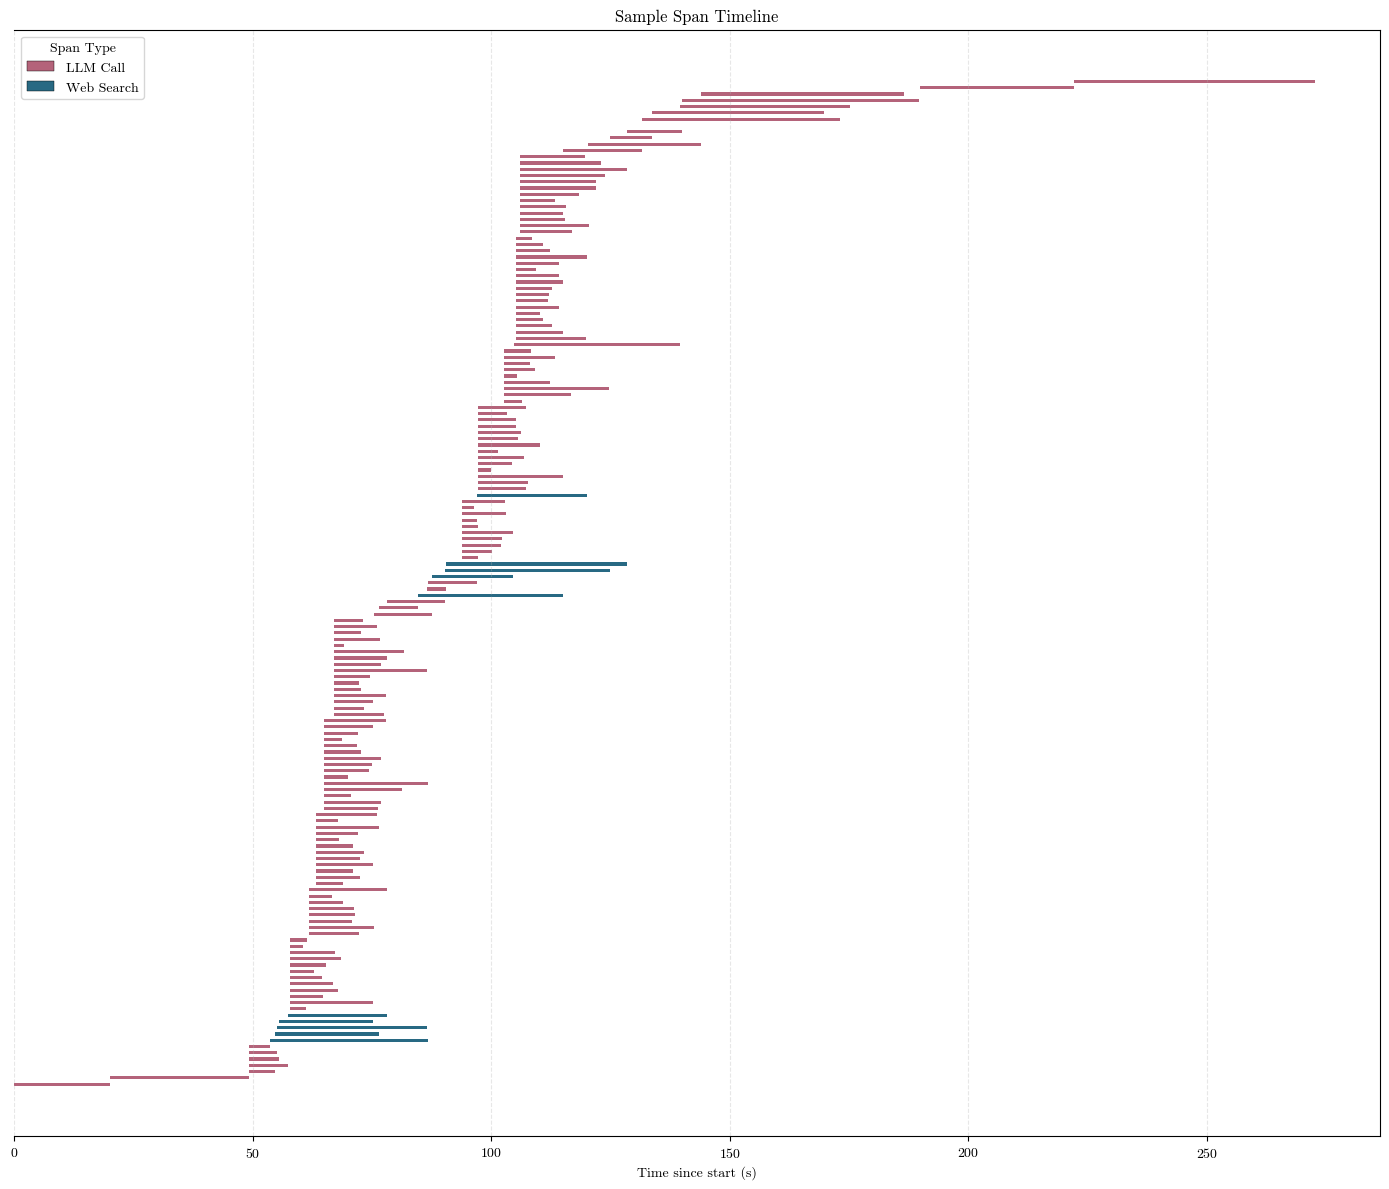

In [41]:
plot_span_timeline(temp, title="Sample Span Timeline")

<Axes: title={'center': 'LLM + Web search latency per run'}, ylabel='Total latency (s)'>

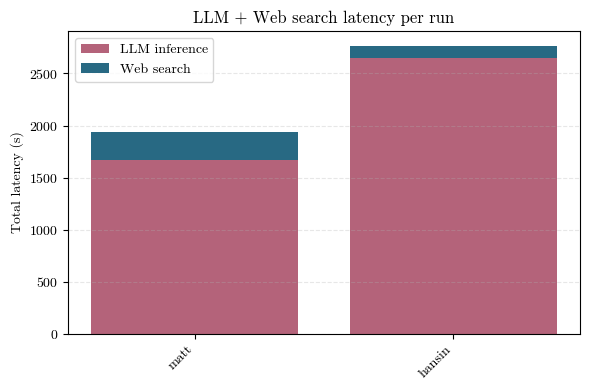

In [ ]:
plot_run_stack_latency(
    {"matt": temp, "hansin": hansin_data},
)